In [1]:
from pathlib import Path
from mare.analysis import RequirementsPreprocessor, NLPAnalyzer, LDAAnalyzer, Word2VecAnalyzer, PreTrainedWord2VecAnalyser, ReqSentenceAnalyser

In [2]:
path_to_requirements = Path('..', 'crowdre_cleaned-csv', 'requirements.csv')
preprocessor = RequirementsPreprocessor(path_to_requirements)
preprocessor._preprocess_requirements()

Number of Tokens (unique): 		87542 (4968)
Number of Lexical Words: 		49374

Vocabulary Size (Lexical Words): 	4851
Vocabulary Size (Stems): 		3242

Average Sentence Length (Tokens): 	30
Average Sentence Length (Lexical Words):17

Lexical Diversity: 			0.011
Requirements containing
	'...I want my smart home to...': 	416/2966 (14.03%)


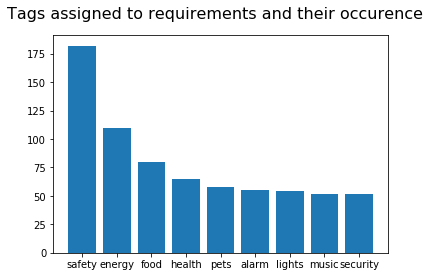

Total amount of tags: 5232
Requirements with tags: 2592 (87.39%)
Tags per Requirement: min: 0, avg: 1, max: 11


In [3]:
nlp = NLPAnalyzer(preprocessor.requirements)

nlp.analyze_vocabulary()
nlp.analyze_tags()

OrderedDict([('Safety', 892), ('Energy', 626), ('Health', 593), ('Entertainment', 471), ('Other', 384)])


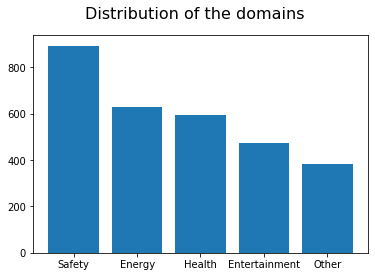

In [7]:
nlp.analyze_domains()

In [8]:
lda = LDAAnalyzer(preprocessor.requirements)
lda.prepare()
lda.test_preparation()

Word 14 ("hous") appears 1 time.
Word 16 ("occup") appears 1 time.
Word 79 ("time") appears 1 time.
Word 129 ("notifi") appears 1 time.
Word 165 ("potenti") appears 1 time.
Word 212 ("avoid") appears 1 time.
Word 220 ("without") appears 1 time.
Word 225 ("enjoy") appears 1 time.


In [9]:
lda.bag_of_words()

In [10]:
lda.tf_idf()
lda.tf_idf_show()

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9707,"occup, save, door, get, water, smart, parent, alert, floor, hous","[As, home, occup, I, want, smart, home, manag, elect, home, activ, movement, go, light, get, aut..."
1,1.0,0.9628,"alert, owner, water, smart, automat, occup, dont, food, time, know","[As, pet, owner, I, want, smart, home, notifi, food, water, level, pet, dish, low, I, track, muc..."
2,2.0,0.9658,"pet, owner, turn, know, dog, door, hous, smart, automat, get","[As, home, occup, I, want, smarthom, featur, close, blind, bedroom, get, lighter, outsid, open, ..."
3,3.0,0.9590,"water, electr, occup, owner, smart, turn, time, energi, save, dont","[As, person, who, concern, energi, consumpt, I, want, smart, dryer, determin, cloth, dri, turn, ..."
4,4.0,0.9608,"music, occup, room, temperatur, clean, smart, use, owner, automat, energi","[As, music, lover, I, want, My, smart, home, prompt, ask, I, get, home, I, would, like, listen, ..."


In [11]:
lda.visualize_tf_idf(n_components=2, perplexity=30, early_exaggeration=12.0, learning_rate=100.0, 
                     verbose=1, random_state=0, angle=.5, init='random', filename='topics.pdf', coloring='topics')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2966 samples in 0.000s...
[t-SNE] Computed neighbors for 2966 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2966
[t-SNE] Computed conditional probabilities for sample 2000 / 2966
[t-SNE] Computed conditional probabilities for sample 2966 / 2966
[t-SNE] Mean sigma: 0.002443
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.831043
[t-SNE] KL divergence after 1000 iterations: 0.283035


In [ ]:
lda.visualize_tf_idf(n_components=2, perplexity=30, early_exaggeration=12.0, learning_rate=100.0, 
                     verbose=1, random_state=0, angle=.5, init='random', filename='domains.pdf', coloring='domains')

In [8]:
word_2_vec = Word2VecAnalyzer(preprocessor.requirements)

In [9]:
word_2_vec.word2vec(5, 50, strict=True)
word_2_vec.visualize()

In [10]:
word_2_vec.word2vec(5, 50, strict=True, training_algorithm=word_2_vec.SKIP_GRAM)
word_2_vec.visualize(annotate=False)

In [11]:
word_2_vec.word2vec(5, 50, strict=True, training_algorithm=word_2_vec.SKIP_GRAM)
word_2_vec.visualize(annotate=True)

KeyboardInterrupt: 

In [ ]:
google_data = Path('D:/MARE/', 'GoogleNews-vectors-negative300.bin')
pt_word_2_vec = PreTrainedWord2VecAnalyser(preprocessor.requirements)
pt_word_2_vec.load(google_data)
pt_word_2_vec.build_vocabulary()
pt_word_2_vec.visualize()

In [ ]:
def build_requirement_vectors(re_list, threshold=100):
    shortest_req = float("inf")
    requirements = []
    for requirement in re_list:
        filtered_tokens = filter(
            lambda token: pt_word_2_vec._token_not_redundant(token) and pt_word_2_vec._token_in_training_data(token),
            requirement.lexical_words
        )
        sentence = pt_word_2_vec.vectors[filtered_tokens]
        if len(sentence) >= threshold:
            shortest_req = min(len(sentence), shortest_req)
            requirements.append(sentence.transpose())
    return requirements, shortest_req

req_vecs, shortest = build_requirement_vectors(pt_word_2_vec.requirements_list, threshold=6)

In [ ]:
from sklearn.manifold import TSNE

def tsne(embedding_clusters, components=2):
    n, m, k = embedding_clusters.shape
    tsne_model_en_2d = TSNE(perplexity=10, n_components=components, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, components)
    return embeddings_en_2d

In [ ]:
import numpy as np

tsne1 = tsne(np.array(pcaed_trans))

pcaed_trans2 = list(map(lambda arr: arr.transpose(), tsne1))
tsne2 = tsne(np.array(pcaed_trans2))

In [ ]:
domains = []
for requirement in preprocessor.requirements:
    filtered_tokens = filter(
        lambda token: pt_word_2_vec._token_not_redundant(token) and pt_word_2_vec._token_in_training_data(token),
        requirement.lexical_words
    )
    sentence = pt_word_2_vec.vectors[filtered_tokens]
    if len(sentence) >= 6 and requirement.domain in ['Energy', 'Health']:
        domains.append(requirement.domain)
    

In [ ]:
colors = {
    'Energy': "rgb(209,50,69)",
    'Entertainment': "rgb(218,135,52)",
    'Health': "rgb(4, 76, 93)",
    'Safety': "rgb(47, 155, 19)",
    'Other': "rgb(255,255,255)",
}

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
for emb, domain in list(zip(tsne2, domains)):
    fig.add_trace(go.Scatter(x=emb[:,0], y=emb[:,1], mode='markers', marker_color=colors[domain]))
fig.show()

In [ ]:
# Analyze requirements of domain "Energy and "Health" only
reqs = filter(lambda req: req.domain in ['Energy', 'Health'], pt_word_2_vec.requirements_list)
req_vecs, shortest = build_requirement_vectors(reqs, threshold=6)

In [ ]:
# Analyze requirement sentences
google_data = Path('D:/MARE/', 'GoogleNews-vectors-negative300.bin')
req_sent = ReqSentenceAnalyser(preprocessor.requirements)
req_sent.load(google_data)

In [ ]:
energy_and_health = filter(lambda re: re.domain in ['Energy', 'Health'], req_sent.requirements_list)
req_sent.build_re_vectors(energy_and_health, min_sentence_length=6)

In [ ]:
req_sent.run()

In [ ]:
req_sent.visualize()

In [ ]:
from sklearn.decomposition import PCA

pcaed = []
pca = PCA(n_components=req_sent.shortest_req)
for vec in req_sent.requirement_vectors:
    pcaed.append(pca.fit_transform(vec))

In [ ]:
import numpy as np

tsne1 = tsne(np.array(pcaed), 1)

In [ ]:
tsne2 = tsne(np.array(list(map(lambda arr: arr.transpose(), tsne1))), 2)

In [ ]:
req_sent_data = req_sent.data
req_sent.data = tsne2

In [ ]:
req_sent.visualize()